In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
uploaded = files.upload()
df = pd.read_csv('diabetes.csv')

Saving diabetes.csv to diabetes.csv


a, set a seed (to ensure work reproducibility) and take a random sample of 25 observations and
find the mean Glucose and highest Glucose values of this sample and compare these statistics
with the population statistics of the same variable. You should use charts for this comparison.

In [3]:
# Set seed and take a random sample of 25
np.random.seed(42)
sample = df.sample(n=25)

# Calculate stats
pop_mean = df['Glucose'].mean()
pop_max = df['Glucose'].max()
sample_mean = sample['Glucose'].mean()
sample_max = sample['Glucose'].max()


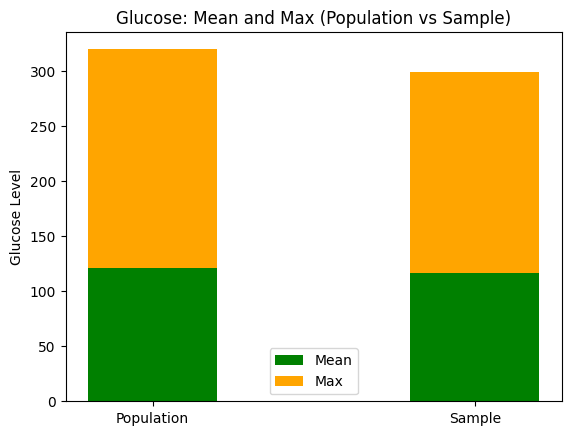

In [5]:
# Plot
plt.bar(['Population', 'Sample'], [pop_mean, sample_mean], width=0.4, label='Mean', color='green')
plt.bar(['Population', 'Sample'], [pop_max, sample_max], width=0.4, bottom=[pop_mean, sample_mean], label='Max', color='orange')
plt.title('Glucose: Mean and Max (Population vs Sample)')
plt.ylabel('Glucose Level')
plt.legend()
plt.show()

b, Find the 98th percentile of BMI of your sample and the population and compare the results
using charts

In [6]:
pop_bmi_98 = np.percentile(df['BMI'], 98)
sample_bmi_98 = np.percentile(sample['BMI'], 98)

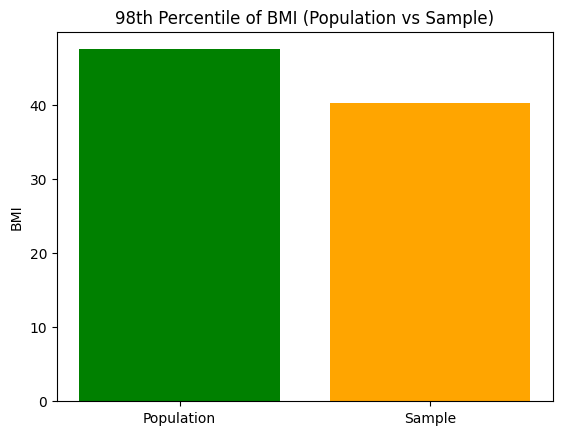

In [7]:
plt.bar(['Population', 'Sample'], [pop_bmi_98, sample_bmi_98], color=['green', 'orange'])
plt.title('98th Percentile of BMI (Population vs Sample)')
plt.ylabel('BMI')
plt.show()

c,  Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the
population and find the average mean, standard deviation and percentile for BloodPressure and
compare this with these statistics from the population for the same variable. Again, you should
create charts for this comparison. Report on your findings.

In [8]:
means, stds, percentiles = [], [], []

for _ in range(500):
    boot = df.sample(n=150, replace=True)['BloodPressure']
    means.append(boot.mean())
    stds.append(boot.std())
    percentiles.append(np.percentile(boot, 98))

In [9]:
boot_mean = np.mean(means)
boot_std = np.mean(stds)
boot_98 = np.mean(percentiles)

In [10]:
# Population stats
pop_mean = df['BloodPressure'].mean()
pop_std = df['BloodPressure'].std()
pop_98 = np.percentile(df['BloodPressure'], 98)

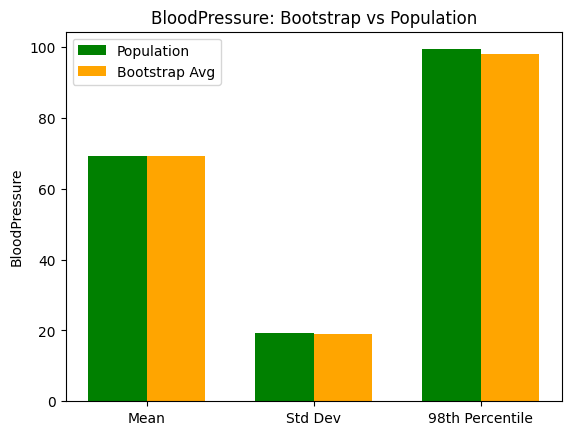

In [11]:
labels = ['Mean', 'Std Dev', '98th Percentile']
pop_vals = [pop_mean, pop_std, pop_98]
boot_vals = [boot_mean, boot_std, boot_98]

x = np.arange(len(labels))
width = 0.35

plt.bar(x - width/2, pop_vals, width, label='Population', color='green')
plt.bar(x + width/2, boot_vals, width, label='Bootstrap Avg', color='orange')

plt.xticks(x, labels)
plt.ylabel('BloodPressure')
plt.title('BloodPressure: Bootstrap vs Population')
plt.legend()
plt.show()